In [1]:
# symetric lower triangle and upper triangle
import numpy as np
import importlib
import h5py
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")

# load anatomical data

In [2]:
# anatomical hierarchy score used in the paper
hierarchy_score = {'LGd' : -0.515,
                   'VISp' : -0.357,
                   'VISl' : -0.093,
                   'VISrl' : -0.059,
                   'LP' : 0.105,
                   'VISal' : 0.152,
                   'VISpm' : 0.327,
                   'VISam' : 0.441}

Text(0.5, 1.0, 'Hierarchy score difference between areas')

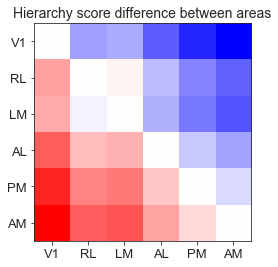

In [5]:
area_names = [ 'V1', 'RL','LM', 'AL',  'PM', 'AM', 'LP']

area_tmp = ['VISp', 'VISrl', 'VISl', 'VISal', 'VISpm', 'VISam']
anatomy_matrix = np.zeros((6,6))
for idx1, a1 in enumerate(area_tmp):
    for idx2, a2 in enumerate(area_tmp):
        anatomy_matrix[idx1, idx2] = hierarchy_score[a1]-hierarchy_score[a2]

plt.imshow(anatomy_matrix, cmap='bwr', vmax=0.8, vmin=-0.8)
plt.xticks(range(6),np.array(area_names), fontsize=13)
plt.yticks(range(6),np.array(area_names), fontsize=13)
plt.title('Hierarchy score difference between areas', fontsize=14)

# load functional data

In [6]:
path_function = '~/neuropixels_platform_paper/data/processed_data/'
[fraction, amp, offset]=np.load(path_function+'ccg_peak_offset_grating25_limit10ms_final_shifted.npy')
[FF_score, FF_score_b, FF_score_std] = np.load(path_function+'FFscore_grating_10.npy')

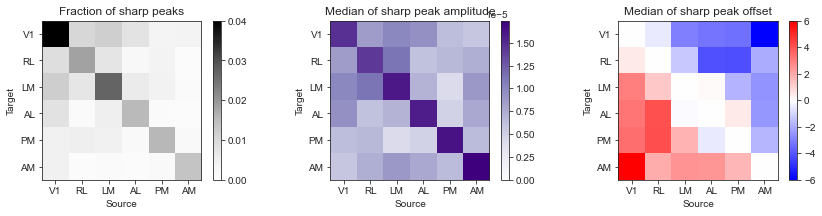

In [7]:
m=6
area_names = [ 'V1', 'RL','LM', 'AL',  'PM', 'AM', 'LP']
plt.figure(figsize=(16,3))
plt.subplot(141)
#plt.imshow(np.log10(COUNT_p[shift_index,:][:,shift_index]), cmap='Greys', vmin=0)
plt.imshow(fraction,cmap='Greys', vmax=0.04, vmin=0)
plt.xticks(range(m), area_names)
plt.yticks(range(m), area_names)
plt.title('Fraction of sharp peaks')
plt.colorbar()
plt.xlabel('Source')
plt.ylabel('Target')

plt.subplot(142)
plt.imshow(amp, cmap='Purples', vmin=0)
plt.xticks(range(m), area_names)
plt.yticks(range(m), area_names)
plt.title('Median of sharp peak amplitude')
plt.colorbar()
plt.xlabel('Source')
plt.ylabel('Target')

plt.subplot(143)
plt.imshow(offset, cmap='bwr', vmin=-6, vmax=6)
plt.xticks(range(m), area_names)
plt.yticks(range(m), area_names)
plt.title('Median of sharp peak offset')
plt.colorbar()
plt.xlabel('Source')
plt.ylabel('Target')
plt.tight_layout()


Text(0.5, 1.0, 'FF score')

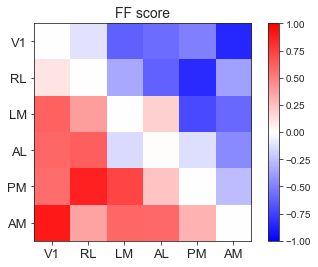

In [8]:
plt.imshow(FF_score, cmap='bwr', vmax=1, vmin=-1)
plt.xticks(range(6),area_names, fontsize=13)
plt.yticks(range(6),area_names, fontsize=13)
plt.colorbar()
plt.title('FF score', fontsize=14)


In [10]:
from scipy.stats import linregress, pearsonr, spearmanr
n=offset.shape[0]
iu = np.triu_indices(n,1)
il = (iu[1],iu[0])

# anatomy
x = np.concatenate([anatomy_matrix[il], np.diag(anatomy_matrix)], axis=0)

# directionality score
y = np.concatenate([FF_score[il], np.diag(FF_score)], axis=0)

# median CCG peak offset
#y = np.concatenate([offset[il], np.diag(offset)], axis=0)

r_s,p_s = spearmanr(x,y)
r_p,p_p = pearsonr(x,y)

text = '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,10)) + '\n' + \
          '$r_P$ = ' + str(np.around(pow(r_p,1),2)) + '; $P_P$ = ' + str(np.around(p_p,10))
    
print(text)

$r_S$ = 0.67; $P_S$ = 0.0009345451
$r_P$ = 0.74; $P_P$ = 0.0001469453


Text(0, 0.5, 'Median of peak offset')

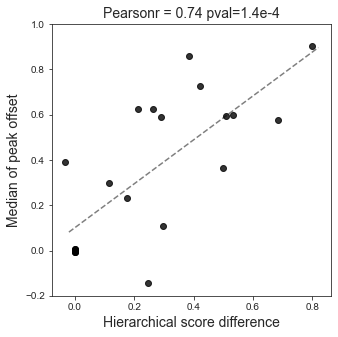

In [11]:
plt.figure(figsize=(5,5))
slope,intercept,r,p,std = linregress(x,y)
x2 = np.linspace(-0.02,0.82,10)
plt.plot(x2,x2*slope+intercept,'--k', alpha=0.5)
plt.scatter(x, y, c='k', alpha=0.8)
plt.ylim([-0.2,1])
plt.title('Pearsonr = '+str(0.74)+' pval=1.4e-4', fontsize=14)
plt.xlabel('Hierarchical score difference', fontsize=14)
plt.ylabel('Median of peak offset', fontsize=14)
